In [23]:
import pandas as pd
import sys
sys.path.append('../scripts')
from plots import plot_histogram, plot_boxplot, calculate_correlations,generate_all_categorical_crosstabs, correlation_matrix
from preprocess import normalize_date, to_datetime, find_outliers, find_and_replace_outliers_with_median

In [2]:
DATA_PATH = '../data'

In [3]:

fraud_data = pd.read_csv(f'{DATA_PATH}/Fraud_Data.csv')

In [4]:
ip_data = pd.read_csv(f'{DATA_PATH}/IpAddress_to_Country.csv')

In [5]:
credit_carddata = pd.read_csv(f'{DATA_PATH}/creditcard.csv')

In [6]:
fraud_data = to_datetime(fraud_data,'purchase_time')
fraud_data = to_datetime(fraud_data, 'signup_time')

In [7]:
fraud_data = find_and_replace_outliers_with_median(fraud_data, ['purchase_value'])
find_outliers(fraud_data)

Processing columns: ['purchase_value']
Found 865 outliers in column 'purchase_value'.
Median value for 'purchase_value' (used for replacement): 35.0
Outliers in column 'purchase_value' replaced with median.
No outliers found in column 'user_id' using z-score threshold 3.
Found 202 outliers in column 'purchase_value'.
Found 553 outliers in column 'age'.
No outliers found in column 'ip_address' using z-score threshold 3.
Found 14151 outliers in column 'class'.


['purchase_value', 'age', 'class']

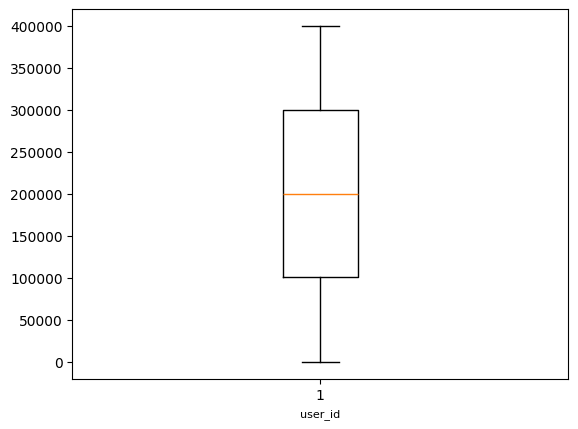

<Figure size 1000x700 with 0 Axes>

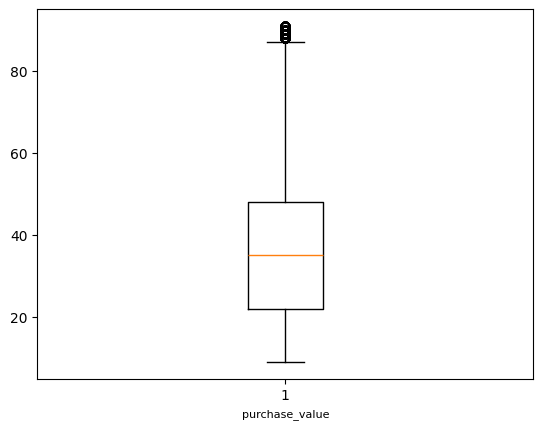

<Figure size 1000x700 with 0 Axes>

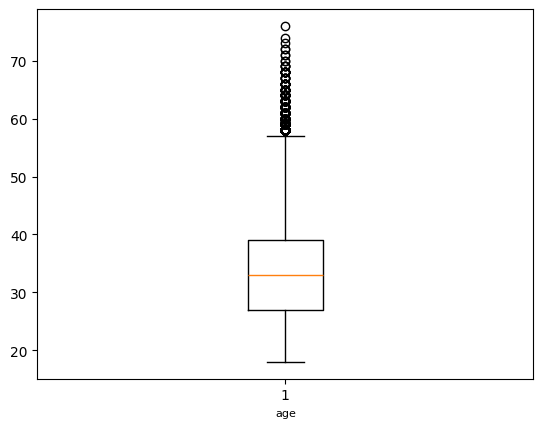

<Figure size 1000x700 with 0 Axes>

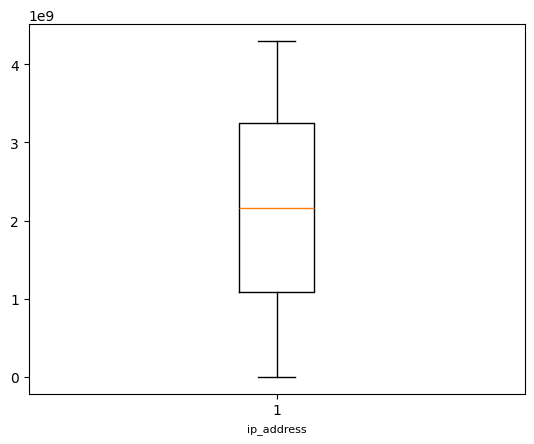

<Figure size 1000x700 with 0 Axes>

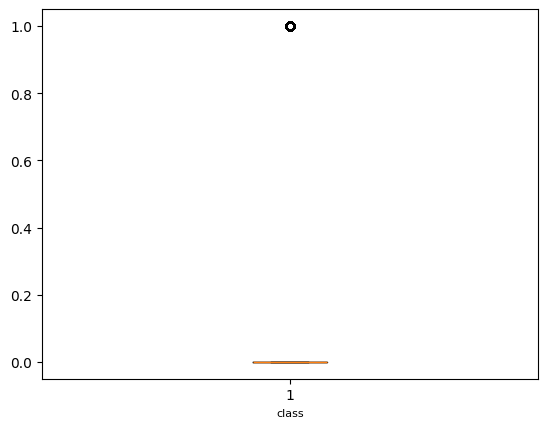

<Figure size 1000x700 with 0 Axes>

In [8]:
plot_boxplot(fraud_data,[])

## univariant analysis

/home/mikiask/anotherproject/Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions-week-8-9/notebooks/../scripts/plots.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=pd.DataFrame(df_to_plot), x=col,
/home/mikiask/anotherproject/Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions-week-8-9/notebooks/../scripts/plots.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=pd.DataFrame(df_to_plot), x=col,
/home/mikiask/anotherproject/Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions-week-8-9/notebooks/../scripts/plots.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v

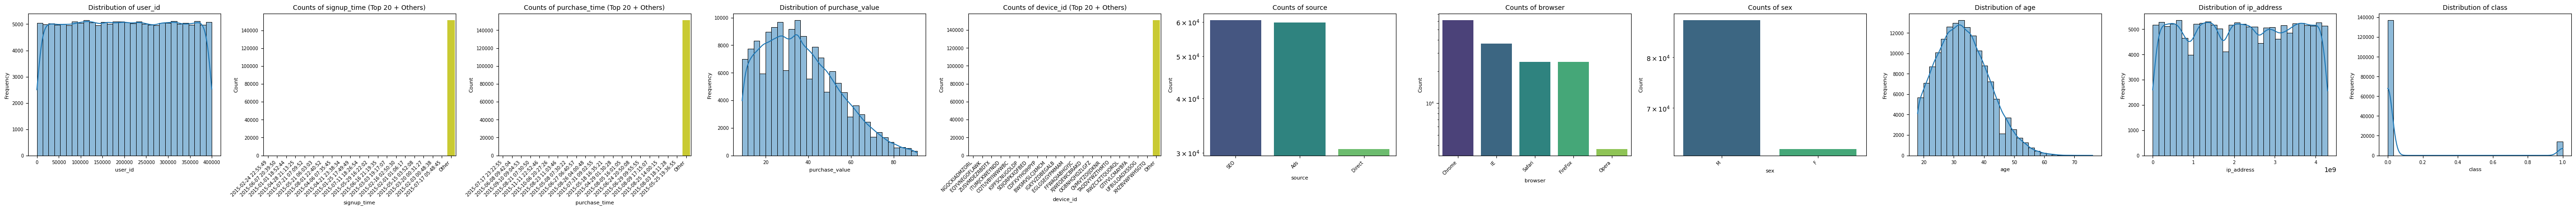

In [9]:
plot_histogram(fraud_data, [])

## bivariant analysis


--- Pearson Correlation Matrix ---
                 user_id  purchase_value       age  ip_address     class
user_id         1.000000        0.001818  0.000611   -0.003144  0.001945
purchase_value  0.001818        1.000000  0.002701    0.000594  0.001652
age             0.000611        0.002701  1.000000    0.001140  0.006624
ip_address     -0.003144        0.000594  0.001140    1.000000 -0.005208
class           0.001945        0.001652  0.006624   -0.005208  1.000000

--- Spearman Correlation Matrix ---
                 user_id  purchase_value       age  ip_address     class
user_id         1.000000        0.002314  0.001079   -0.003156  0.001945
purchase_value  0.002314        1.000000  0.002968    0.000867  0.001099
age             0.001079        0.002968  1.000000    0.001675  0.007507
ip_address     -0.003156        0.000867  0.001675    1.000000 -0.005271
class           0.001945        0.001099  0.007507   -0.005271  1.000000


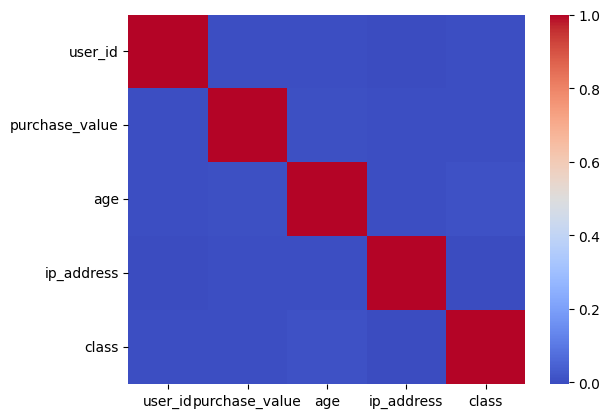

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
result = calculate_correlations(fraud_data)
sns.heatmap(result['pearson_corr'], cmap='coolwarm')
plt.show()


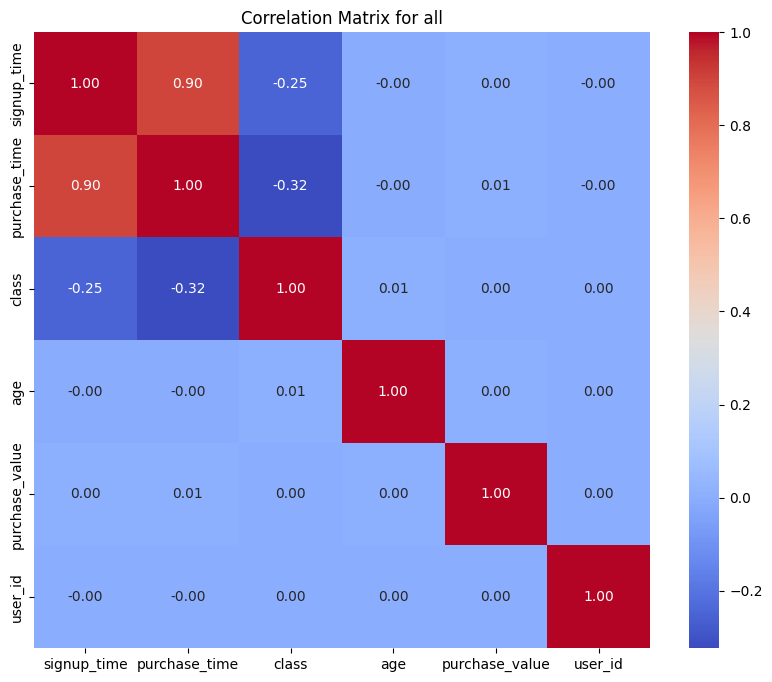

In [30]:
correlation_matrix(fraud_data,['signup_time', 'purchase_time','class','age', 'purchase_value', 'user_id'], 'all')

In [11]:
result = generate_all_categorical_crosstabs(fraud_data, normalize_method='index')

Found 4 categorical columns: ['device_id', 'source', 'browser', 'sex']

Generating contingency tables for all unique pairs...

--- Crosstab: 'device_id' vs 'source' ---
source         Ads  Direct  SEO
device_id                      
AAALBGNHHVMKG  0.0     1.0  0.0
AAAWIHVCQELTP  1.0     0.0  0.0
AAAXJHWCLISKY  1.0     0.0  0.0
AAAXXOZJRZRAO  1.0     0.0  0.0
AABFGRPBQHWFQ  1.0     0.0  0.0
...            ...     ...  ...
ZZZGSIJRNCXBJ  1.0     0.0  0.0
ZZZIKLJSVSQMF  1.0     0.0  0.0
ZZZKJIZHJEDFN  0.0     1.0  0.0
ZZZMVOGBAJVTM  1.0     0.0  0.0
ZZZXASJUVUNMV  0.0     1.0  0.0

[137956 rows x 3 columns]

--- Crosstab: 'device_id' vs 'browser' ---
browser        Chrome  FireFox   IE  Opera  Safari
device_id                                         
AAALBGNHHVMKG     1.0      0.0  0.0    0.0     0.0
AAAWIHVCQELTP     1.0      0.0  0.0    0.0     0.0
AAAXJHWCLISKY     0.0      0.0  1.0    0.0     0.0
AAAXXOZJRZRAO     0.0      1.0  0.0    0.0     0.0
AABFGRPBQHWFQ     0.0      0.0  0.0   

## Merge IP dataset with fraud dataset

In [12]:
combined_data = pd.concat([fraud_data, ip_data], axis=1)

In [13]:
sorted_fraud = fraud_data.sort_values('ip_address')
sorted_ip = ip_data.sort_values('lower_bound_ip_address')
merged_df = pd.merge_asof(
    sorted_fraud,
    sorted_ip[['lower_bound_ip_address', 'upper_bound_ip_address', 'country']],
    left_on='ip_address',
    right_on='lower_bound_ip_address',
    direction='forward',
    allow_exact_matches=True
)
fraud_ip_with_country = merged_df[(merged_df['ip_address'] < merged_df['upper_bound_ip_address']) & (merged_df['lower_bound_ip_address'] < merged_df['ip_address'])]

# result_countries = fraud_ip_with_country
# fraud_data['country'] = result_countries

In [14]:
fraud_ip_with_country

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country


In [15]:
fraud_data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [16]:
ip_data.loc[(ip_data['lower_bound_ip_address']< 1797069085.53522) & (1797069085.53522 < ip_data['upper_bound_ip_address'])]

,lower_bound_ip_address,upper_bound_ip_address,country
32808,1.796735e+09,1797259263,United States


In [17]:
def get_country_for_ip(ip, ip_data_df):
    """
    Finds the country for a given IP address within the ip_data_df ranges.
    """
    mask = (ip_data_df['lower_bound_ip_address'] <= ip) & \
           (ip < ip_data_df['upper_bound_ip_address'])
    
    # Check if there's a match
    if mask.any():
        # Return the country of the first match (assuming no overlapping ranges)
        return ip_data_df.loc[mask, 'country'].iloc[0]
    else:
        return None # Or some other default value like 'Unknown'

# Apply the function to each IP address in fraud_data
fraud_data['located_country'] = fraud_data['ip_address'].apply(
    lambda x: get_country_for_ip(x, ip_data)
)


In [18]:
fraud_data.drop_duplicates()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,located_country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,None
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States
...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,United States
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,Netherlands
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,Japan
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,United States


In [19]:
fraud_data['located_country'] = fraud_data['located_country'].ffill()

In [20]:
fraud_data.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'located_country'],
      dtype='object')

## Feature Engineering

To prepare raw fraud transaction data into a clean, balanced, and numerically represented format, ready for machine learning model training

In [21]:
from feature_pipeline import process_frude
numerical_cols = []
category_cols = []

for col in fraud_data.columns:
    if col == 'class':
        continue
    if pd.api.types.is_numeric_dtype(fraud_data[col]):
        numerical_cols.append(col)
    else:
        category_cols.append(col)
train_setup = process_frude(fraud_data, numerical_cols, category_cols)

['user_id', 'purchase_value', 'age', 'ip_address', 'signup_time', 'purchase_time', 'device_id', 'source', 'browser', 'sex', 'located_country']
Original Training Set Class Distribution:
class
0    95872
1     9906
Name: count, dtype: int64
--------------------------------------------------
Shape of X_train_processed_df after pipeline: (105778, 47)
First 5 rows of X_train_processed_df (features engineered, scaled, encoded):
        num__user_id  num__purchase_value  num__age  num__ip_address  \
61049       0.427657             0.303158 -0.248771        -0.597850   
141787     -0.868316             0.077307 -0.132895        -1.027313   
84407       0.879840            -1.390722  0.330606        -0.657122   
115800     -0.270130            -1.390722 -1.639274         0.321883   
61857       0.376487             0.246696 -0.596397         0.589787   

        cat__signup_time_1439871635000000000  \
61049                                    0.0   
141787                                   0.0 